# ==================== Polynomial Regression =================================
(Liniear Regression with input power mutliplyer usage)

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# to make this notebook's output stable across runs
np.random.seed(42)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

The file Data/ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

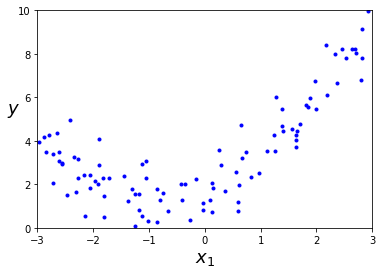

In [2]:

m = 100 # amount of examples
# np.random.rand(m,1) #100 random numbers between 0 > x < 1

X = 6 * np.random.rand(m, 1) - 3 # 100 examples between -3 > X < 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Sinus curve calculation ( u shaped data) + grausian noise => trying to find this

# fig = pyplot.figure(figsize=(16,4))
# ax_1 = fig.add_subplot(1, 2, 1)
# ax_1.scatter(X[:,0],y, color = 'black')
# ax_1.legend(['Training data'])

pyplot.plot(X, y, "b.")
pyplot.xlabel("$x_1$", fontsize=18)
pyplot.ylabel("$y$", rotation=0, fontsize=18)
pyplot.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
pyplot.show()


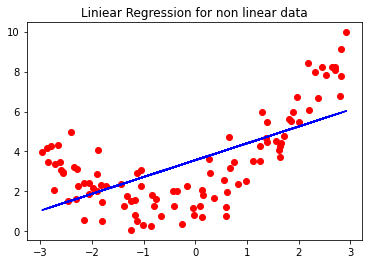

In [4]:
# trying to establish a prediction with a liniear prediction model, when the data isn't
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

pyplot.scatter(X,y, color='red')
pyplot.plot(X,lin_reg.predict(X), color='blue')
pyplot.title("Liniear Regression for non linear data")
pyplot.show()

In [5]:
#  Polynomial Regressions - bending the input data in order to use a linear prediction model to guess the result

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0]) # original X
print(X_poly[0]) # original X + polynomial feature


[-0.75275929]
[-0.75275929  0.56664654]


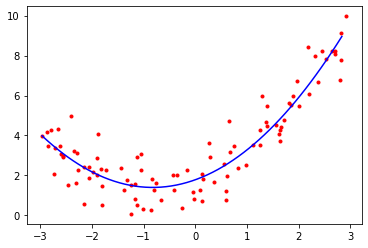

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

pyplot.plot(X,y, "r.") 
 
pyplot.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='blue') 

Lin Regression prediction for y = intercept = 2.36175501 / Coef = 0.99762722 0.53868577

Original y result calculation = 0.5 * X**2 + X + 2 + np.random.rand(m, 1) # gaussian noise

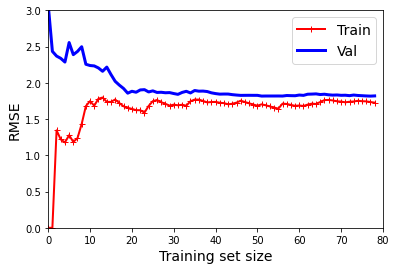

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict[:m]))
    
    pyplot.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    pyplot.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    pyplot.legend(loc="upper right", fontsize=14)   # not shown in the book
    pyplot.xlabel("Training set size", fontsize=14) # not shown
    pyplot.ylabel("RMSE", fontsize=14) 


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
pyplot.axis([0, 80, 0, 3])                         # not shown in the book
pyplot.show()   

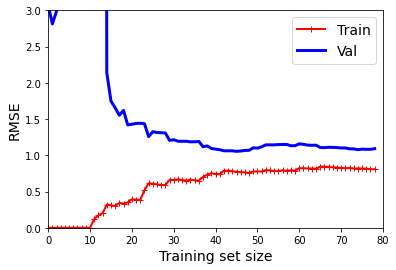

In [17]:
# Create a pipeline to execute multiple def, after one another

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X,y)
pyplot.axis([0, 80, 0, 3])                        
pyplot.show()     